This code load results from deeplabcut and analyze tail angles

In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [2]:
path = r'E:\piezo\20211201\\'
files = [f for f in listdir(path+'original\\') if isfile(join(path+'original\\', f))]

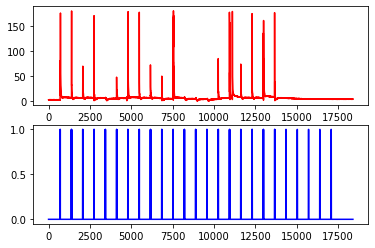

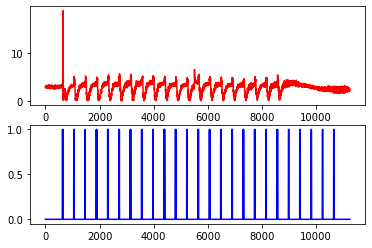

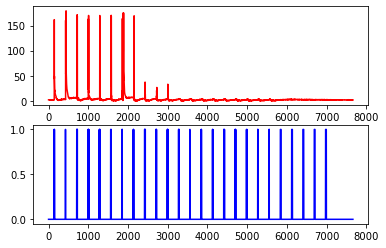

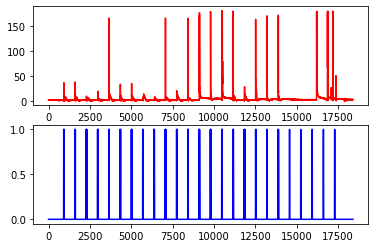

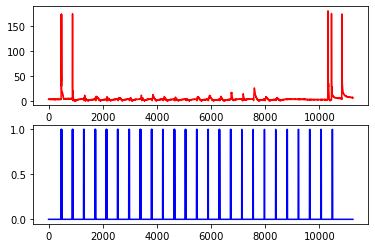

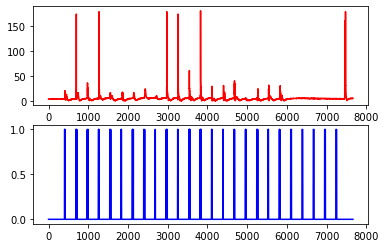

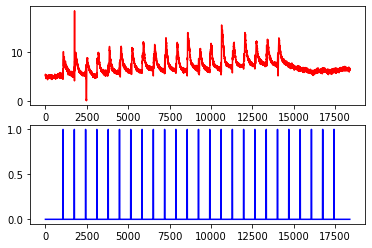

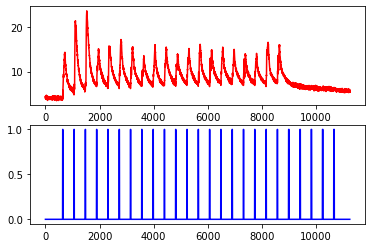

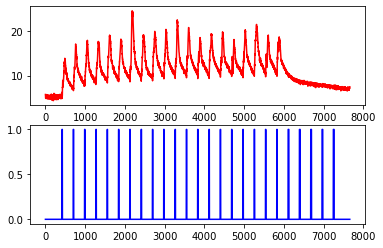

In [3]:
for file in files:
    #load file
    name = file[:-4]
    file = path+'deeplabcut\\'+name+'.csv'
    LED_file = path+'led\\'+name+'.npy'
    
    data = pd.read_csv(file)#load deeplabcut result
    raw_data = data.to_numpy()
    stimulus = np.load(LED_file)#Load stimulus (time of LED onset)
    total_frame = len(raw_data)-2#Number of frame
    
    body2 = np.zeros([2,total_frame])#position of tail front
    body3 = np.zeros([2,total_frame])#position of tail end
    
    head = np.array([np.mean(raw_data[2:,10].astype(float)),np.mean(raw_data[2:,11].astype(float))])#head position (fixed)
    body1 = np.array([np.mean(raw_data[2:,1].astype(float)),np.mean(raw_data[2:,2].astype(float))])#swim-bladder position (fixed)
    body2[0,:] = raw_data[2:,4].astype(float)
    body2[1,:] = raw_data[2:,5].astype(float)
    body3[0,:] = raw_data[2:,7].astype(float)
    body3[1,:] = raw_data[2:,8].astype(float)
    original_direction = body1-head#body axis (fixed)
    tail_direction = body3 - body2#tail axis
    degree = np.zeros([1,total_frame])#degree between body axis and tail axis
    
    #####Calcuate degree between body axis and tail axis#####
    for i in range(total_frame):
        inner = np.inner(original_direction,tail_direction[:,i])
        norms = np.linalg.norm(original_direction)*np.linalg.norm(tail_direction[:,i])
        cos = inner/norms
        rad = np.arccos(np.clip(cos, -1.0, 1.0))#radius
        deg = np.rad2deg(rad)#degree
        degree[0,i] = deg
    
    #plot and save result
    fig, (ax1, ax2) = plt.subplots(2,1)
    ax1.plot(degree[0,:],'r')
    ax2.plot(stimulus[0,:],'b')
    plt.savefig(path+'result\\'+name+'.jpg')
    